In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report , accuracy_score
from imutils import paths
import numpy as np
# from scipy.misc import imread, imresize
from skimage.io import imread  , imshow
import cv2
import os

# plotting graphs
import seaborn as sns
import matplotlib.pyplot as plt

# scores
from sklearn.metrics import (
    accuracy_score ,
    recall_score ,
    precision_score,
    f1_score , 
    confusion_matrix,
)

In [2]:
# os.listdir("data/KNN/")

In [3]:
# !unzip  data/KNN/KNN.zip -d data/data/KNN

In [4]:

# import the necessary packages
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
#from pyimagesearch.preprocessing import SimplePreprocessor
#from pyimagesearch.datasets import SimpleDatasetLoader
from imutils import paths
import numpy as np
# from scipy.misc import imread, imresize
from skimage.io import imshow , imread
import cv2
import os

def load(imagePath_list, verbose=-1):
		# initialize the list of features and labels
		data = []
		labels = []

		# loop over the input images
		for (i, imagePath) in enumerate(imagePath_list):
			# load the image and extract the class label assuming
			# that our path has the following format:
			# /path/to/dataset/{class}/{image}.jpg
			image = cv2.imread(imagePath)
           
            # imread(imagePath)
            
            #imread(imagePath)
            
			label = imagePath.split(os.path.sep)[-2]

			# check to see if our preprocessors are not None
			image = cv2.resize(image, (32, 32),interpolation = cv2.INTER_AREA)

			# treat our processed image as a "feature vector"
			# by updating the data list followed by the labels
			data.append(image)
			labels.append(label)

			# show an update every `verbose` images
			if verbose > 0 and i > 0 and (i + 1) % verbose == 0:
				print("[INFO] processed {}/{}".format(i + 1,
					len(imagePath_list)))

		# return a tuple of the data and labels
		return (np.array(data), np.array(labels))
# grab the list of images that we'll be describing
print("[INFO] loading images...")

imagePath_list = list(paths.list_images("data/KNN/KNN/animals"))
# initialize the image preprocessor, load the dataset from disk,
# and reshape the data matrix
(data, labels) = load(imagePath_list, verbose=500)
data = data.reshape((data.shape[0], 3072))

# show some information on memory consumption of  the images
print("[INFO] features matrix: {:.1f}MB".format(
	data.nbytes / (1024 * 1000.0)))


[INFO] loading images...
[INFO] processed 500/3000
[INFO] processed 1000/3000
[INFO] processed 1500/3000
[INFO] processed 2000/3000
[INFO] processed 2500/3000
[INFO] processed 3000/3000
[INFO] features matrix: 9.0MB


In [5]:
data.shape , labels.shape

((3000, 3072), (3000,))

In [6]:
# normalize data
# since the range of the color distribution ranges from 0-255
# data will be normalized by dividing byb 255
data = data/255

In [7]:
# encode the labels to int
enc = LabelEncoder()
enc.fit(labels)
# labels will be encode to digits i.e 0,1,2
y = enc.transform(labels)

In [8]:
# split the data 
#first split 70 , 30
X_train, test, y_train, ytest = train_test_split(
    data, y, 
    test_size=0.3, 
    random_state=42
    )

In [9]:
# we then split the test data into 67 33 
#thats 10 , 20 from the original datadet

X_test, X_val, y_test, y_val = train_test_split(
    test, ytest, 
    test_size=0.3, 
    random_state=42
    )

In [10]:
# check the sizes if they match
X_train.shape , y_train.shape , X_val.shape , y_val.shape , X_test.shape , y_test.shape

((2100, 3072), (2100,), (270, 3072), (270,), (630, 3072), (630,))

In [13]:
# create the model
class KNearestNeighborModel(object):
    """
     a kNN classifier with both L1 & L2 distance 
     predict() method from this class returns two arrays
     the arrays are prediction for both L1  and L2
    """
    def __init__(self , k=7):
      """
      Inputs:
      - k: The number of nearest neighbors that vote for the predicted labels.
      """
      self.k = k

    def train(self, X, y):
      """
        Train the classifierby just
        memorizing the training data.
        Inputs:
        - X: A numpy array of shape (train-size.shape) with the training data
        - y: A numpy array of shape (Num_train,) containing the training labels
        where each label is for each train data in its location

      """
      self.X_train = X
      self.y_train = y

    def predict(self, X):
        """
        Predict labels for test data using the kneibour classifier object(self).
        Inputs:
         - X: A numpy array of shape (test-size.shape) with the test data
        Methods:
         - It uses L1 and L2 to compute the distaces which are used to determine the nearest neibour
        Returns:
        - y: A numpy array of shape (test.shape[0],) containing predicted labels for the
          where each label is for each test data in its location
        """
        num_test = X.shape[0]

        # array to hold distance for both L1 and L2
        predl1 = np.zeros(num_test, dtype=self.y_train.dtype)
        predl2 = np.zeros(num_test, dtype=self.y_train.dtype)
        # loop through each image parameters while calculating the 
        #both l1 and l2 distances and also return the predictions based on k
        # loop through each row
        for i in range(num_test):
          # using L1 distance
          L1_distances = np.sum(np.abs(self.X_train - X[i, :]), axis=-1)
          K_index = np.argsort(L1_distances)[:self.k]
          K_labels=[]
          for j in range(len(K_index)):
              K_labels.append(self.y_train[K_index[j]])
          predl1[i] = max(set(K_labels), key = K_labels.count)

          # using l2 distances
          L2_distances = np.sqrt(np.sum(np.square(self.X_train - X[i,:]), axis = 1))
          K_index = np.argsort(L2_distances)[:self.k]
          K_labels=[]
          for j in range(len(K_index)):
              K_labels.append(self.y_train[K_index[j]])
          predl2[i] = max(set(K_labels), key = K_labels.count)

        # return bothe predictions for l1 and l2
        return predl1 , predl2

    

In [14]:
print("Using KNN we have created....")
print("training starting...")
scoresl1 = []
scoresl2 = []
k_testers = [ 3, 5, 7]
for k in range(len(k_testers)):
    k_neigh = k_testers[k]
    knn_scatch = KNearestNeighborModel(k=k_neigh)
    knn_scatch.train(X_train, y_train)
    predl1 , predl2 = knn_scatch.predict(X_test)
    scoresl1.append(accuracy_score(y_test ,predl1))
    scoresl2.append(accuracy_score(y_test ,predl2))
# round of to 5d.p
scoresl1  = np.round(scoresl1 , 4)
scoresl2 =  np.round(scoresl2 , 4)

Using KNN we have created....
training starting...


In [15]:
# function to draw the plots
# it will create a plot and save it based on parameters given
def drawPlot(scores , k_vals , plot_name , distance_type):
  plt.figure(figsize=(7,5))
  fig = sns.barplot(y = scores, x = k_vals)
  plt.xlabel("K_values")
  plt.ylabel("Accuracy Score")
  plt.title(f"Scores for Each Value of K  using {distance_type}  distance")
  for p in fig.patches: 
    fig.annotate(format(p.get_height(), '.3f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, -12), 
                   textcoords = 'offset points')
  # save the fig
  plt.savefig(plot_name)


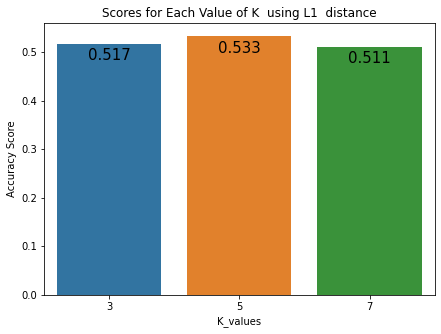

In [16]:
# draw for l1 distance
drawPlot(scoresl1 , k_testers , "L1_scores.png" , "L1")

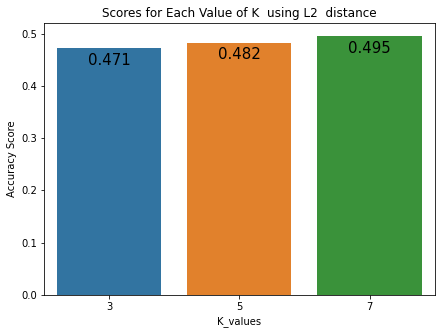

In [17]:
# draw plot for L2 distance
drawPlot(scoresl2 , k_testers , "L2_scores.png" , "L2")

In [18]:
# since we have determined the best distance type and best k type..
# lets use them to create a classifier for them

# the best distance to use is L1 with k as 5
classifier = KNearestNeighborModel(k = 5)
classifier.train(X_train, y_train)
# the predict function returns two  arrays
# the first array is prediction using L1 distances
#the second one is using L2 distances 
predl1 , predl2 = classifier.predict(X_test)
print(f"Accuracy  for L1 is  {accuracy_score(y_test ,predl1 )}")
# lets also see what l2 will produce
print(f"Accuracy For L2 is  {accuracy_score(y_test ,predl2 )}")

Accuracy  for L1 is  0.5333333333333333
Accuracy For L2 is  0.48253968253968255


In [19]:
# get the score metrics 
# NOTE .... We are using L1 distance since it has the best score
acc_score = accuracy_score(y_test , predl1)
pre_score = precision_score(y_test , predl1 , average='weighted')
rec_score = recall_score(y_test , predl1 , average='weighted')
f_score = f1_score(y_test , predl1 , average='weighted')
# print out the metrics 
print(f"Accuracy Score is {acc_score}\n")
print(f"Recall Score is {rec_score}\n")
print(f"Precision Score is {pre_score}\n")
print(f"F-Score is {f_score}\n")


Accuracy Score is 0.5333333333333333

Recall Score is 0.5333333333333333

Precision Score is 0.6016990161588996

F-Score is 0.537088926422045



In [23]:
c_matrix = confusion_matrix(y_test ,predl2 )
c_matrix

array([[128,  63,   5],
       [110, 121,   3],
       [ 81,  64,  55]])

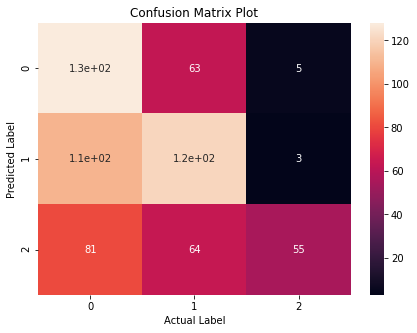

In [20]:
# plot confusion matrix for better view
plt.figure(figsize=(7,5))
sns.heatmap(c_matrix , annot= True , annot_kws={"size": 10})
plt.xlabel("Actual Label")
plt.ylabel("Predicted Label")
plt.title("Confusion Matrix Plot")
plt.savefig("ConfusinMatrix.png")

In [21]:
# using Kneigh from sklearn for to check the differences
print("Using Sklearn Knn")
scores_sk = []
k_testers = [ 3, 5, 7]
print("training started....")
for k in range(len(k_testers)):
    k_neigh = k_testers[k]
    knn = KNeighborsClassifier(n_neighbors=k_neigh)
    knn.fit(X_train, y_train)
    scores_sk.append(knn.score(X_val, y_val))

Using Sklearn Knn
training started....


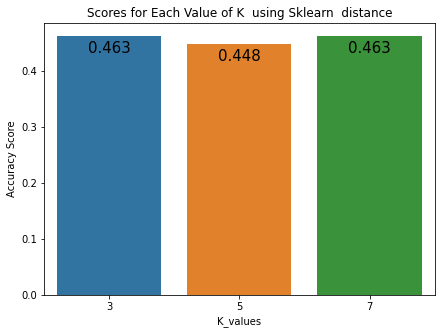

In [22]:
# draw plot for using sklearn model
drawPlot(scores_sk , k_testers , "sklearn_scores.png" , "Sklearn")